<h1>Extracting Stock Data Using a Python Library</h1>


In [1]:
#!pip install yfinance
#!pip install pandas

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Extracting Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock.

### Stock Info


Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [3]:
def stock_details(instrument):
    inst_data = yf.Ticker(instrument)
    inst_info = inst_data.info
    shares_max = inst_data.history(period="10y")
    shares_max.reset_index(inplace=True)
    shares_3m = inst_data.history(period="2mo")
    shares_3m.reset_index(inplace=True)
    shares_1y = inst_data.history(period="1y")
    shares_1y.reset_index(inplace=True)
    inst_name = inst_info["shortName"]
    print(f"{instrument} - {inst_name}")
    recomm = inst_info["recommendationKey"]
    current_price = inst_info["currentPrice"]
    currency = inst_info['currency']
    max_price = inst_info["targetHighPrice"]
    mean_price = inst_info["targetMeanPrice"]
    min_price = inst_info["targetLowPrice"]
    print(f"Current Price: {current_price} {currency}")
    print(f"Max Target Price: {max_price} {currency}")
    print(f"Mean Target Price: {mean_price} {currency}")
    print(f"Min Target Price: {min_price} {currency}")
    print(f"Recommendation: {recomm}")
    
    plt.figure(figsize=(15,10))
    plt.subplot(5, 2, 1)
    plt.plot(shares_max["Date"],shares_max["Open"])
    plt.title(inst_name +"("+instrument+")"+ '- Share Price [P: 10 Years]')
    plt.ylabel("share price")
    plt.xticks(rotation = 30)
    plt.subplot(5, 2, 2)
    plt.bar(shares_max["Date"],shares_max["Volume"], color='brown')
    plt.title(inst_name +"("+instrument+")"+ '- Trading Volume [P: 10 Years]')
    plt.ylabel("Volume Traded")
    plt.xticks(rotation = 30)
    
    plt.subplot(5, 2, 3)
    plt.plot(shares_3m["Date"],shares_3m["Open"])
    plt.title(inst_name +"("+instrument+")"+ '- Share Price [P: 2 Months]')
    plt.ylabel("share price")
    plt.xticks(rotation = 30)
    plt.subplot(5, 2, 4)
    plt.bar(shares_3m["Date"],shares_3m["Volume"], color='brown')
    plt.title(inst_name +"("+instrument+")"+ '- Trading Volume [P: 2 Months]')
    plt.ylabel("Volume Traded")
    plt.xticks(rotation = 30)
    
    plt.subplot(5, 2, 5)
    plt.plot(shares_1y["Date"],shares_1y["Open"])
    plt.title(inst_name +"("+instrument+")"+ '- Share Price [P: 1 Year]')
    plt.ylabel("share price")
    plt.xticks(rotation = 30)
    plt.subplot(5, 2, 6)
    plt.bar(shares_1y["Date"],shares_1y["Volume"], color='brown')
    plt.title(inst_name +"("+instrument+")"+ '- Trading Volume [P: 1 Year]')
    plt.ylabel("Volume Traded")
    plt.xticks(rotation = 30)
#     plt.subplot(5, 2, 7)
#     plt.plot(shares_max["Date"],shares_max.freeCashflow)
#     plt.title(inst_name +"("+instrument+")"+ '- Free Cash Flow [P: 10 Year]')
#     plt.ylabel("share price")
#     plt.xticks(rotation = 30)
#     plt.subplot(5, 2, 8)
#     plt.bar(shares_1y["Date"],shares_1y["Volume"], color='brown')
#     plt.title(inst_name +"("+instrument+")"+ '- Trading Volume [P: 1 Year]')
#     plt.ylabel("Volume Traded")
#     plt.xticks(rotation = 30)
    plt.tight_layout()
    plt.show()
    inst_data.financials
    inst_data.quarterly_financials
    inst_data.major_holders
    

In [4]:
company_ticker = "AAPL"

AAPL - Apple Inc.
Current Price: 170.78 USD
Max Target Price: 210 USD
Mean Target Price: 174.22 USD
Min Target Price: 128.01 USD
Recommendation: buy


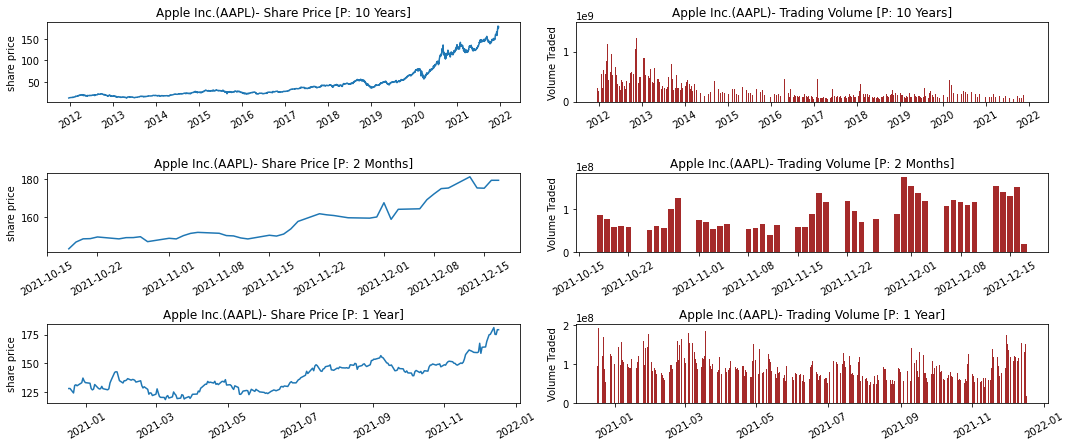

In [5]:
stock_details(company_ticker)
data = yf.Ticker(company_ticker)

In [6]:
apple = yf.Ticker("NIO")
inst_info = apple.info
inst_info

{'zip': '201804',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 7763,
 'longBusinessSummary': 'NIO Inc. designs, develops, manufactures, and sells smart electric vehicles in China. The company offers five, six, and seven-seater electric SUVs, as well as smart electric sedans. It is also involved in the provision of energy and service packages to its users; marketing, design, and technology development activities; manufacture of e-powertrains, battery packs, and components; and sales and after sales management activities. In addition, the company offers power solutions, including Power Home, a home charging solution; Power Swap, a battery swapping service; Public Charger, a public fast charging solution; Power Mobile, a mobile charging service through charging vans; Power Map, an application that provides access to a network of public chargers and their real-time information; and One Click for Power valet service, where it offers vehicle pick up, charging, and return services. F

In [7]:
data.recommendations.tail(20)

,Firm,To Grade,From Grade,Action
Date,,,,
2021-07-28 12:04:58,Morgan Stanley,Overweight,,main
2021-07-28 12:30:58,Wells Fargo,Overweight,,main
2021-07-28 13:19:21,Canaccord Genuity,Buy,,main
2021-07-28 14:04:02,Piper Sandler,Overweight,,main
2021-07-28 14:08:03,Deutsche Bank,Buy,,main
2021-07-28 14:20:34,Loop Capital,Buy,,main
2021-09-01 13:06:05,Wolfe Research,Peer Perform,Underperform,up
2021-09-09 13:49:40,Piper Sandler,Overweight,,main
2021-09-22 16:07:34,Tigress Financial,Strong Buy,,main


In [8]:
inst_desc = inst_info["longBusinessSummary"]
print(f"Business Summary: {inst_desc}")

Business Summary: NIO Inc. designs, develops, manufactures, and sells smart electric vehicles in China. The company offers five, six, and seven-seater electric SUVs, as well as smart electric sedans. It is also involved in the provision of energy and service packages to its users; marketing, design, and technology development activities; manufacture of e-powertrains, battery packs, and components; and sales and after sales management activities. In addition, the company offers power solutions, including Power Home, a home charging solution; Power Swap, a battery swapping service; Public Charger, a public fast charging solution; Power Mobile, a mobile charging service through charging vans; Power Map, an application that provides access to a network of public chargers and their real-time information; and One Click for Power valet service, where it offers vehicle pick up, charging, and return services. Further, it provides repair, maintenance, and bodywork services through its NIO servic